# Training Datasets

## Experiment 3

In [1]:
import sys
sys.path.append("../src")
from utils.common.pathManager import FilePath
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cv2 import imread
import pandas as pd
xbd_path = FilePath("/media/mrtc101/Martín SSD/tesis/datasets/xBD")

In [2]:
from preprocessing.prepare_folder.create_label_masks import create_masks
from utils.visualization.label_to_color import LabelDict

def count_pxls(mask_path):
    row = np.zeros(6,np.uint16)
    count_tup = np.unique(imread(mask_path)[:,:,0],return_counts=True)
    for l,c in zip(count_tup[0],count_tup[1]):
        row[l] = c
    return list(row)

def count_blds(json_path):
    label_dict = json_path.read_json()
    label_count = pd.Series(data=np.zeros(6, dtype=np.uint16), index=LabelDict.labels.keys())
    for building in label_dict['features']['xy']:
        dmg_label = building['properties'].get('subtype')
        if dmg_label in label_count.index:
            label_count[dmg_label] += 1
    row = label_count.tolist()
    return list(row)

#create_masks(xbd_path)
splits_dict = FilePath("/home/mrtc101/Desktop/tesina/repo/prev_outs/exp5/exp5/data/splits/raw_splits copy.json").read_json()
px_rows = []
bld_rows = []
for split_id, dis_dict in splits_dict.items():
    for dis_id, tile_dict in dis_dict.items():
        for tile_id in tile_dict.keys():
            imgs_dict = tile_dict[tile_id]["post"]
            mask_path = FilePath(imgs_dict["mask"])
            json_path = FilePath(imgs_dict["json"])
            px_count = count_pxls(mask_path)
            bld_count = count_blds(json_path)
            px_rows.append([split_id,dis_id,tile_id]+px_count)
            bld_rows.append([split_id,dis_id,tile_id]+bld_count)

In [3]:
bld_Count_df  = pd.DataFrame(bld_rows,columns=["split_id","dis_id","tile_id"]+list(LabelDict().labels.keys()))
bld_Count_df

,split_id,dis_id,tile_id,background,no-damage,minor-damage,major-damage,destroyed,un-classified
0,val,socal-fire,00000756,0,12,0,0,2,5
1,val,socal-fire,00001267,0,10,0,0,4,0
2,val,socal-fire,00000742,0,15,0,0,8,0
3,val,socal-fire,00000684,0,9,0,1,1,2
4,val,socal-fire,00001014,0,14,0,0,70,0
...,...,...,...,...,...,...,...,...,...
1248,test,joplin-tornado,00000129,0,6,17,21,100,5
1249,test,joplin-tornado,00000063,0,0,1,3,40,3
1250,test,joplin-tornado,00000088,0,11,8,4,65,7
1251,test,joplin-tornado,00000147,0,1,4,20,355,0


In [4]:
px_Count_df  = pd.DataFrame(px_rows,columns=["split_id","dis_id","tile_id"]+list(LabelDict().labels.keys()))
px_Count_df

,split_id,dis_id,tile_id,background,no-damage,minor-damage,major-damage,destroyed,un-classified
0,val,socal-fire,00000756,56640,7628,0,0,1268,0
1,val,socal-fire,00001267,53294,7376,0,0,4866,0
2,val,socal-fire,00000742,51705,9981,0,0,3850,0
3,val,socal-fire,00000684,52834,10343,0,628,1731,0
4,val,socal-fire,00001014,56659,25802,0,0,48611,0
...,...,...,...,...,...,...,...,...,...
1248,test,joplin-tornado,00000129,50049,2949,20566,24068,33440,0
1249,test,joplin-tornado,00000063,34914,0,1644,3618,25360,0
1250,test,joplin-tornado,00000088,385,4074,8784,10943,41350,0
1251,test,joplin-tornado,00000147,54945,1296,3873,16887,54071,0


# Bld count per disaster

In [5]:
bld_matrix = bld_Count_df.drop(columns=["split_id","background"]).groupby(["dis_id"]).apply(lambda x: x.sum(axis=0,numeric_only=True),include_groups=False)
bld_matrix["Total"] = bld_matrix.sum(axis=1)

total = bld_matrix.sum(axis=0)
bld_matrix.loc[("Total"),:] = total

#train_total_s = bld_matrix.loc["val"].sum(axis=0)
#bld_matrix.loc[("val","Total"),:] = train_total_s

#test_total_s = bld_matrix.loc["test"].sum(axis=0)
#bld_matrix.loc[("test","Total"),:] = test_total_s

bld_matrix = bld_matrix.astype(int)
bld_matrix

,no-damage,minor-damage,major-damage,destroyed,un-classified,Total
dis_id,,,,,,
guatemala-volcano,42,2,0,0,0,44
hurricane-florence,692,11,74,1,45,823
hurricane-harvey,919,2169,9884,388,173,13533
hurricane-matthew,753,8880,1231,701,327,11892
hurricane-michael,1266,1070,348,132,36,2852
joplin-tornado,623,668,487,2298,119,4195
lower-puna-volcano,302,10,1,229,85,627
mexico-earthquake,47,0,0,0,17,64
midwest-flooding,627,32,20,19,34,732


In [6]:
bld_matrix = bld_Count_df.drop(columns=["background"]).groupby(["split_id","dis_id"]).apply(lambda x: x.sum(axis=0,numeric_only=True),include_groups=False)
bld_matrix["Total"] = bld_matrix.sum(axis=1)

total = bld_matrix.sum(axis=0)
bld_matrix.loc[("Total","-"),:] = total

train_total_s = bld_matrix.loc["test"].sum(axis=0)
bld_matrix.loc[("train","Total"),:] = train_total_s

train_total_s = bld_matrix.loc["val"].sum(axis=0)
bld_matrix.loc[("val","Total"),:] = train_total_s

test_total_s = bld_matrix.loc["test"].sum(axis=0)
bld_matrix.loc[("test","Total"),:] = test_total_s

bld_matrix = bld_matrix.astype(int)
bld_matrix

no-damage  minor-damage  major-damage  \
split_id dis_id                                                       
test     guatemala-volcano           10             2             0   
         hurricane-florence          73             1             6   
         hurricane-harvey            91           136           525   
         hurricane-matthew          137           724           336   
         hurricane-michael          231           158            74   
         joplin-tornado              52           112           122   
         lower-puna-volcano          26             0             0   
         midwest-flooding            98             5             0   
         moore-tornado               12             0             0   
         nepal-flooding               8            25           257   
         palu-tsunami                 0             0             0   
         pinery-bushfire            107             2             2   
         portugal-wildfire          123             0             0   
         santa-rosa-wildfire        113            13             7   
         socal-fire                 109             3             5   
         sunda-tsunami               27             0             0   
         tuscaloosa-tornado          36             4             1   
         woolsey-fire               127             3             3   
train    guatemala-volcano           19             0             0   
         hurricane-florence         574             9            68   
         hurricane-harvey           764          1653          8517   
         hurricane-matthew          470          6777           794   
         hurricane-michael          985           884           253   
         joplin-tornado             554           510           338   
         lower-puna-volcano         259            10             1   
         mexico-earthquake           47             0             0   
         midwest-flooding           428            20            13   
         moore-tornado              317           159           152   
         nepal-flooding             507           476           602   
         palu-tsunami              1398             1           211   
         pinery-bushfire            726            11            16   
         portugal-wildfire         1166            11            18   
         santa-rosa-wildfire        818            26            29   
         socal-fire                1107            14            17   
         sunda-tsunami               85             0             1   
         tuscaloosa-tornado         489           337            49   
         woolsey-fire               800            28            19   
val      guatemala-volcano           13             0             0   
         hurricane-florence          45             1             0   
         hurricane-harvey            64           380           842   
         hurricane-matthew          146          1379           101   
         hurricane-michael           50            28            21   
         joplin-tornado              17            46            27   
         lower-puna-volcano          17             0             0   
         mexico-earthquake            0             0             0   
         midwest-flooding           101             7             7   
         moore-tornado              123            55            31   
         nepal-flooding             197            96           213   
         palu-tsunami               317             0            68   
         pinery-bushfire             69             0             1   
         portugal-wildfire          215             4            13   
         santa-rosa-wildfire        128             2             3   
         socal-fire                 163             0             1   
         sunda-tsunami               20             0             0   
         tuscaloosa-tornado          12             0 

# pixel count by disaster

In [7]:
px_matrix = px_Count_df.groupby(["split_id","dis_id"]).apply(lambda x: x.sum(axis=0,numeric_only=True),include_groups=False)
px_matrix["Total"] = px_matrix.sum(axis=1)

train_total_s = px_matrix.loc["test"].sum(axis=0)
px_matrix.loc[("train","Total"),:] = train_total_s

val_total_s = px_matrix.loc["val"].sum(axis=0)
px_matrix.loc[("val","Total"),:] = train_total_s

test_total_s = px_matrix.loc["test"].sum(axis=0)
px_matrix.loc[("test","Total"),:] = test_total_s


total = px_matrix.sum(axis=0)
px_matrix.loc[("Total","-"),:] = total
px_matrix = px_matrix.astype(int)
px_matrix

background  no-damage  minor-damage  \
split_id dis_id                                                     
test     guatemala-volcano         59594       5463           479   
         hurricane-florence       311826      68888          1209   
         hurricane-harvey          84235      57360        127704   
         hurricane-matthew        162955      61468        192761   
         hurricane-michael        249397     133479         93183   
         joplin-tornado           188268      27520         96570   
         lower-puna-volcano       167638      19092             0   
         midwest-flooding         509850      77291          2338   
         moore-tornado             46545      18991             0   
         nepal-flooding            98469       2148          7920   
         palu-tsunami                  0          0             0   
         pinery-bushfire          587645      64462           339   
         portugal-wildfire        647573      69732             0   
         santa-rosa-wildfire      416995     178548         10628   
         socal-fire               553699     107295          3194   
         sunda-tsunami            119335      11737             0   
         tuscaloosa-tornado       150479      40994          3957   
         woolsey-fire             540421      64873          2493   
train    guatemala-volcano        106762      24310             0   
         hurricane-florence      3141638     527829          7810   
         hurricane-harvey        2770054     843537       1319990   
         hurricane-matthew       1189321     213849        821498   
         hurricane-michael       1213408     961161        636626   
         joplin-tornado           827754     374581        377324   
         lower-puna-volcano      1369008     123563          6081   
         mexico-earthquake        237008      90672             0   
         midwest-flooding        2465151     259161         10638   
         moore-tornado            822158     297872        170074   
         nepal-flooding           812004     242040        189027   
         palu-tsunami            1279924     468685           833   
         pinery-bushfire         4177029     442794          6549   
         portugal-wildfire       6373658     786359          4461   
         santa-rosa-wildfire     2178871     812059         47260   
         socal-fire              4267244    1121811         13410   
         sunda-tsunami            447775      74814             0   
         tuscaloosa-tornado      1087157     514901        173936   
         woolsey-fire            3231040     594269         15672   
val      guatemala-volcano         46404      19132             0   
         hurricane-florence       231770      28247          2127   
         hurricane-harvey         232660      65600        126295   
         hurricane-matthew        334295      44854        132263   
         hurricane-michael         52249      84126         61377   
         joplin-tornado            50730       9084         76974   
         lower-puna-volcano       177184       6546             0   
         mexico-earthquake             0          0             0   
         midwest-flooding         486578      91343          3354   
         moore-tornado             72655      79650         53817   
         nepal-flooding           287390      69528         60813   
         palu-tsunami             162892     176800             0   
         pinery-bushfire          356135      36733             0   
         portugal-wildfire        812327     130814          1119   
         santa-rosa-wildfire      119127      37825          3179   
         socal-fire               655080     177406             0   
         sunda-tsunami             71327      59745             0   
         tuscaloosa-tornado        49946      15590             0   
         woolsey-fire             271687      43033           416   
train    Total              

# Predicted weights

In [8]:
pxsum = px_matrix.loc[("Total","-")][:5]
weights = pxsum.sum() / pxsum
weights

background       1.557939
no-damage        6.910764
minor-damage    14.885318
major-damage    13.277565
destroyed       14.098547
Name: (Total, -), dtype: float64

# distribution of buildings per tile

array([[<Axes: title={'center': 'no-damage'}>,
        <Axes: title={'center': 'minor-damage'}>],
       [<Axes: title={'center': 'major-damage'}>,
        <Axes: title={'center': 'destroyed'}>]], dtype=object)

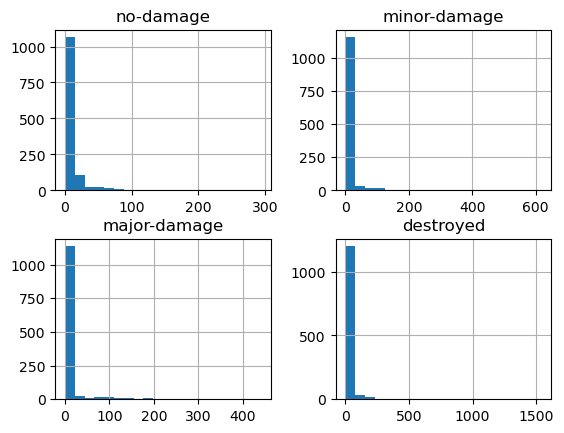

In [9]:
bld_Count_df.set_index(["split_id","dis_id","tile_id"]).drop(columns=["background","un-classified"]).hist(bins=20)

# distribution of pixels per tile

array([[<Axes: title={'center': 'no-damage'}>,
        <Axes: title={'center': 'minor-damage'}>],
       [<Axes: title={'center': 'major-damage'}>,
        <Axes: title={'center': 'destroyed'}>]], dtype=object)

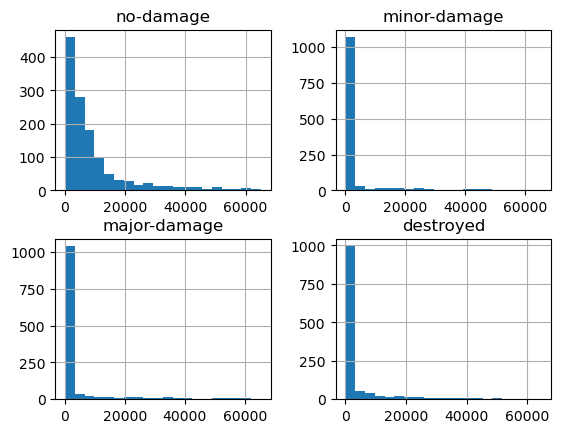

In [10]:
px_Count_df.set_index(["split_id","dis_id","tile_id"]).drop(columns=["background","un-classified"]).hist(bins=20)

# Disaster Sum

In [11]:
bld_Count_df.value_counts("split_id")

split_id
train    1002
val       126
test      125
Name: count, dtype: int64

In [12]:
bld_matrix = bld_Count_df.drop(columns=["split_id","background"]).groupby(["dis_id"]).apply(lambda x: x.sum(axis=0,numeric_only=True),include_groups=False)
bld_matrix["Total"] = bld_matrix.sum(axis=1)
print(bld_matrix["Total"].sort_values(ascending=False).to_latex())


\begin{tabular}{lr}
\toprule
 & Total \\
dis_id &  \\
\midrule
hurricane-harvey & 13533 \\
hurricane-matthew & 11892 \\
palu-tsunami & 6430 \\
santa-rosa-wildfire & 5067 \\
joplin-tornado & 4195 \\
hurricane-michael & 2852 \\
nepal-flooding & 2474 \\
socal-fire & 2298 \\
moore-tornado & 1836 \\
portugal-wildfire & 1829 \\
woolsey-fire & 1595 \\
tuscaloosa-tornado & 1220 \\
pinery-bushfire & 1064 \\
hurricane-florence & 823 \\
midwest-flooding & 732 \\
lower-puna-volcano & 627 \\
sunda-tsunami & 380 \\
mexico-earthquake & 64 \\
guatemala-volcano & 44 \\
\bottomrule
\end{tabular}



# Experiment 4

In [13]:
#create_masks(xbd_path)
splits_dict = FilePath("/home/mrtc101/Desktop/tesina/repo/prev_outs/exp9/data/splits/raw_splits copy.json").read_json()
px_rows = []
bld_rows = []
for split_id, dis_dict in splits_dict.items():
    for dis_id, tile_dict in dis_dict.items():
        for tile_id in tile_dict.keys():
            imgs_dict = tile_dict[tile_id]["post"]
            mask_path = FilePath(imgs_dict["mask"])
            json_path = FilePath(imgs_dict["json"])
            px_count = count_pxls(mask_path)
            bld_count = count_blds(json_path)
            px_rows.append([split_id,dis_id,tile_id]+px_count)
            bld_rows.append([split_id,dis_id,tile_id]+bld_count)


In [14]:
bld_Count_df  = pd.DataFrame(bld_rows,columns=["split_id","dis_id","tile_id"]+list(LabelDict().labels.keys()))
bld_Count_df

,split_id,dis_id,tile_id,background,no-damage,minor-damage,major-damage,destroyed,un-classified
0,train,socal-fire,00000470,0,7,0,0,1,0
1,train,socal-fire,00000235,0,4,0,1,21,3
2,train,socal-fire,00000756,0,12,0,0,2,5
3,train,socal-fire,00000328,0,25,0,0,0,4
4,train,socal-fire,00000558,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2996,test,joplin-tornado,00000111,0,10,2,1,2,1
2997,test,joplin-tornado,00000051,0,29,0,0,0,5
2998,test,joplin-tornado,00000088,0,11,8,4,65,7
2999,test,joplin-tornado,00000014,0,7,15,14,44,2


In [15]:
px_Count_df  = pd.DataFrame(px_rows,columns=["split_id","dis_id","tile_id"]+list(LabelDict().labels.keys()))
px_Count_df

,split_id,dis_id,tile_id,background,no-damage,minor-damage,major-damage,destroyed,un-classified
0,train,socal-fire,00000470,60428,4314,0,0,794,0
1,train,socal-fire,00000235,48663,3051,0,1922,11900,0
2,train,socal-fire,00000756,56640,7628,0,0,1268,0
3,train,socal-fire,00000328,56817,8719,0,0,0,0
4,train,socal-fire,00000558,59251,6285,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2996,test,joplin-tornado,00000111,39534,51717,11453,4213,24155,0
2997,test,joplin-tornado,00000051,58357,7179,0,0,0,0
2998,test,joplin-tornado,00000088,385,4074,8784,10943,41350,0
2999,test,joplin-tornado,00000014,45782,5492,18352,17850,43596,0


# Bld count per disaster

In [16]:
bld_matrix = bld_Count_df.drop(columns=["split_id","background"]).groupby(["dis_id"]).apply(lambda x: x.sum(axis=0,numeric_only=True),include_groups=False)
bld_matrix["Total"] = bld_matrix.sum(axis=1)

total = bld_matrix.sum(axis=0)
bld_matrix.loc[("Total"),:] = total

#train_total_s = bld_matrix.loc["val"].sum(axis=0)
#bld_matrix.loc[("val","Total"),:] = train_total_s

#test_total_s = bld_matrix.loc["test"].sum(axis=0)
#bld_matrix.loc[("test","Total"),:] = test_total_s

bld_matrix = bld_matrix.astype(int)
bld_matrix

,no-damage,minor-damage,major-damage,destroyed,un-classified,Total
dis_id,,,,,,
guatemala-volcano,197,11,3,1,1,213
hurricane-florence,3403,53,377,38,387,4258
hurricane-harvey,1954,2993,11134,439,297,16817
hurricane-matthew,1213,9801,1623,1368,449,14454
hurricane-michael,5640,2750,1024,445,122,9981
joplin-tornado,1099,801,594,2598,201,5293
lower-puna-volcano,1800,28,20,399,351,2598
mexico-earthquake,350,4,1,0,43,398
midwest-flooding,2479,100,79,39,89,2786


In [17]:
print(bld_matrix.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
 & no-damage & minor-damage & major-damage & destroyed & un-classified & Total \\
dis_id &  &  &  &  &  &  \\
\midrule
guatemala-volcano & 197 & 11 & 3 & 1 & 1 & 213 \\
hurricane-florence & 3403 & 53 & 377 & 38 & 387 & 4258 \\
hurricane-harvey & 1954 & 2993 & 11134 & 439 & 297 & 16817 \\
hurricane-matthew & 1213 & 9801 & 1623 & 1368 & 449 & 14454 \\
hurricane-michael & 5640 & 2750 & 1024 & 445 & 122 & 9981 \\
joplin-tornado & 1099 & 801 & 594 & 2598 & 201 & 5293 \\
lower-puna-volcano & 1800 & 28 & 20 & 399 & 351 & 2598 \\
mexico-earthquake & 350 & 4 & 1 & 0 & 43 & 398 \\
midwest-flooding & 2479 & 100 & 79 & 39 & 89 & 2786 \\
moore-tornado & 1634 & 294 & 213 & 1054 & 119 & 3314 \\
nepal-flooding & 3099 & 1236 & 1829 & 91 & 433 & 6688 \\
palu-tsunami & 1956 & 1 & 313 & 4469 & 87 & 6826 \\
pinery-bushfire & 2708 & 19 & 43 & 98 & 267 & 3135 \\
portugal-wildfire & 7258 & 59 & 108 & 389 & 427 & 8241 \\
santa-rosa-wildfire & 1684 & 48 & 46 & 4448 & 40 & 6266 